In [2]:
REFERENCE_PATH = '/content/drive/MyDrive/Colab Notebooks/bleu/common.mt'
TRANSLATEPLUS_API_PATH = '/content/drive/MyDrive/Colab Notebooks/bleu/translated_api.mt'
OPEN_NMT_PATH = '/content/drive/MyDrive/Colab Notebooks/bleu_selftrained/translated_opennmt.mt'

In [ ]:
!pip install sacrebleu

In [24]:
from sacrebleu.metrics import BLEU
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def open_file(filepath):
  with open(filepath,'r',encoding='utf-8') as input_file:
    return [x.rstrip("\n") for x in input_file.readlines()]

In [5]:
references = [open_file(REFERENCE_PATH)]
trans_api = open_file(TRANSLATEPLUS_API_PATH)
trans_model = open_file(OPEN_NMT_PATH)

In [20]:
bleu_api = BLEU(lowercase=True)
bleu_api.corpus_score(trans_api, references)

BLEU = 47.08 73.5/54.2/41.4/32.1 (BP = 0.981 ratio = 0.981 hyp_len = 321059 ref_len = 327122)

In [21]:
bleu_model = BLEU(lowercase=True)
bleu_model.corpus_score(trans_model, references)

BLEU = 41.94 70.9/50.1/36.9/27.8 (BP = 0.960 ratio = 0.961 hyp_len = 314293 ref_len = 327122)

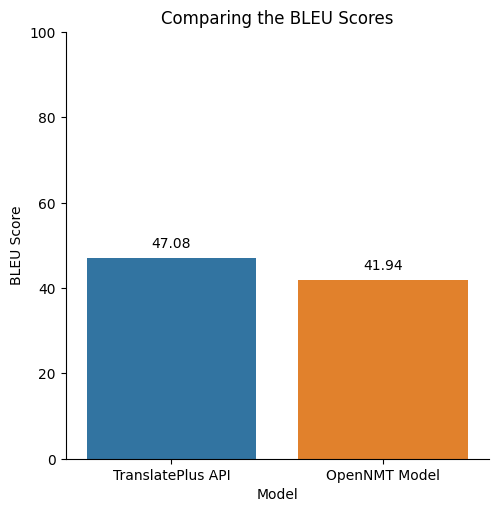

In [27]:
data = {
    'BLEU Score': [47.08, 41.94],
    'Model': ['TranslatePlus API', 'OpenNMT Model']
}

df = pd.DataFrame(data)

bleu_plot = sns.catplot(
    data=df,
    kind="bar",  # Specifies vertical bar chart
    x="Model",  # Specifies the column containing the categories
    y="BLEU Score",  # Specifies the column containing the scores
)

# Use `set()` to pass arguments to `catplot()`
plt.title("Comparing the BLEU Scores")

ax = bleu_plot.ax

# Add data value labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.ylim(0, 100)

# Show the chart
plt.show()